# Problem Statement

2.	In this time and age of widespread internet usage, effective and targeted marketing plays a vital role. A marketing company <br> would like to develop a strategy by analyzing their customer data. For this, data like age, location, time of activity, etc. <br> has been collected to determine whether a user will click on an ad or not. Perform Logistic Regression on the given data <br> to predict whether a user will click on an ad or not. 

----- ##### -------------

Lets import our libraries and do EDA on our dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,15)

In [2]:
data = pd.read_csv('advertising.csv')
data.head()                   

,Daily_Time_ Spent _on_Site,Age,Area_Income,Daily Internet Usage,Ad_Topic_Line,City,Male,Country,Timestamp,Clicked_on_Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/03/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/04/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/03/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10/01/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,3/06/2016 3:36,0


In [3]:
data.shape

(1000, 10)

We have 1000 rows and 10 columns in our dataset

In [4]:
data.columns

Index(['Daily_Time_ Spent _on_Site', 'Age', 'Area_Income',
       'Daily Internet Usage', 'Ad_Topic_Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked_on_Ad'],
      dtype='object')

In [5]:
data.dtypes

Daily_Time_ Spent _on_Site    float64
Age                             int64
Area_Income                   float64
Daily Internet Usage          float64
Ad_Topic_Line                  object
City                           object
Male                            int64
Country                        object
Timestamp                      object
Clicked_on_Ad                   int64
dtype: object

Now we will check for any missing value in our dataset

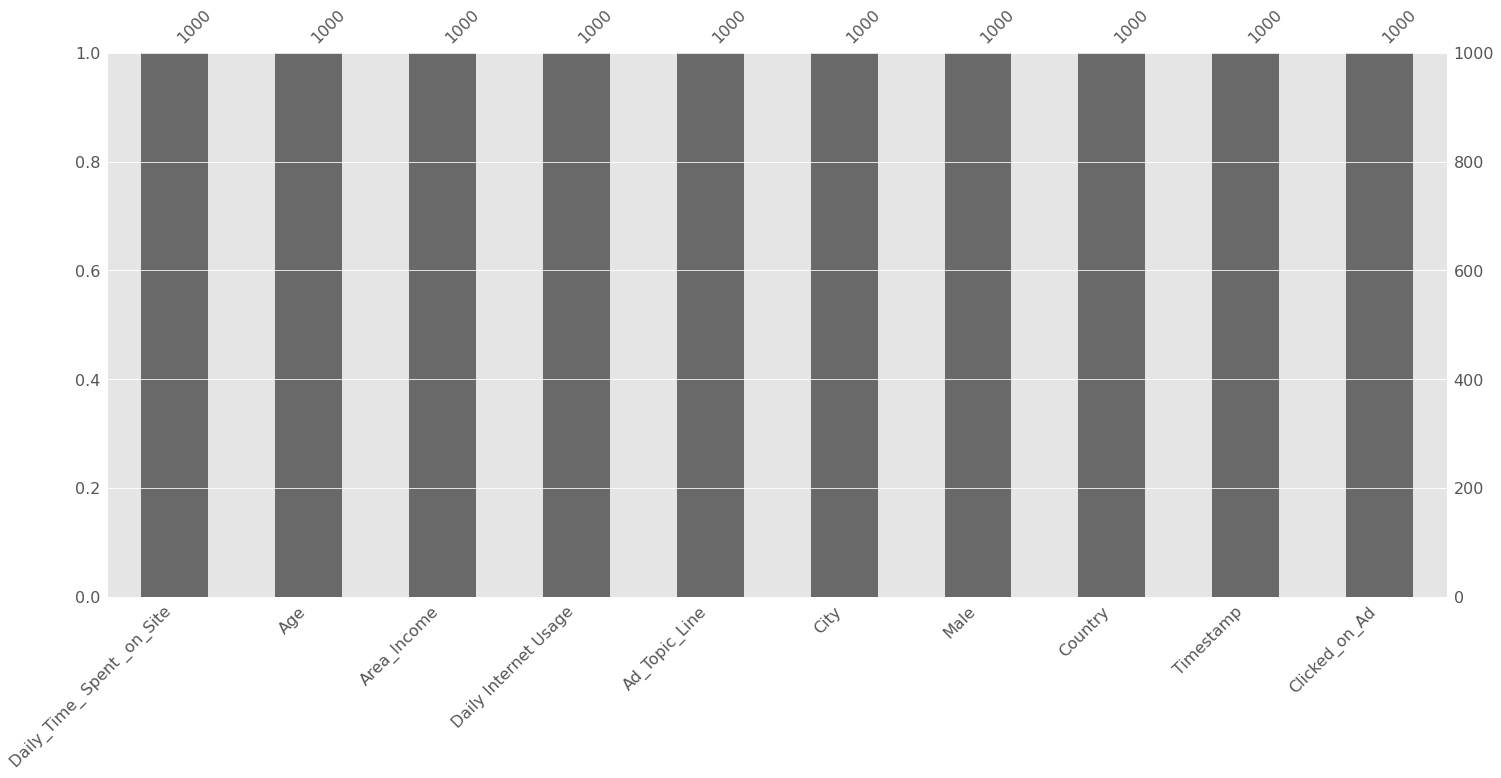

In [6]:
msno.bar(data)

There are no missing values in our dataset

We will now explore our dataset

In [7]:
data.describe()

,Daily_Time_ Spent _on_Site,Age,Area_Income,Daily Internet Usage,Male,Clicked_on_Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


1    0.5
0    0.5
Name: Clicked_on_Ad, dtype: float64


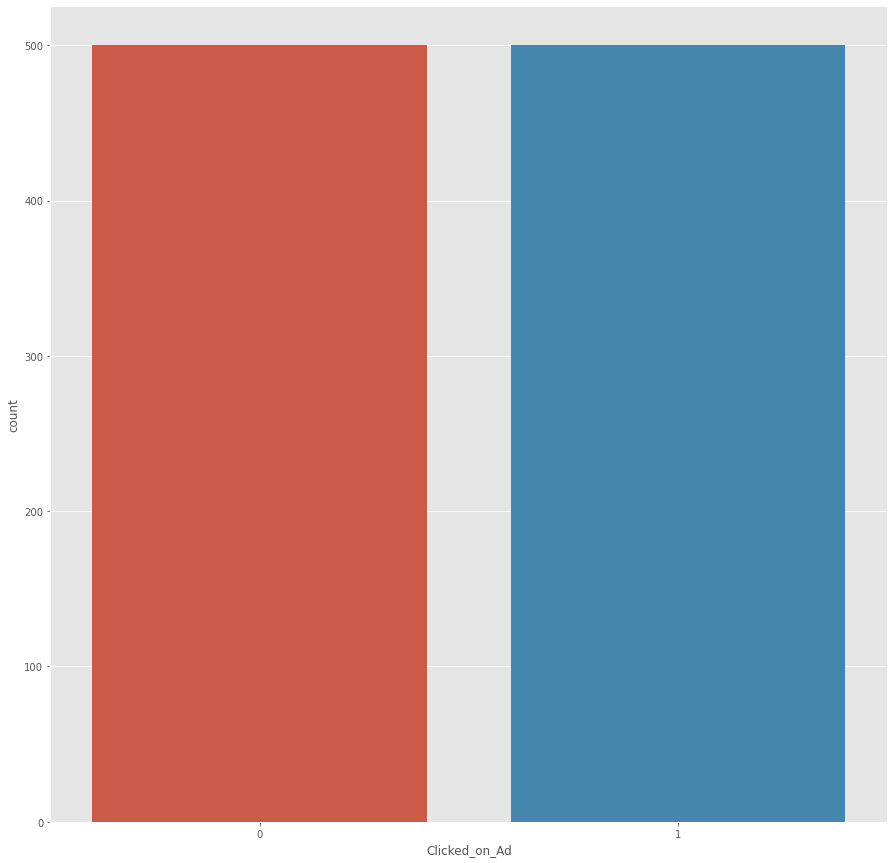

In [8]:
sns.countplot('Clicked_on_Ad',data=data)
print(data.Clicked_on_Ad.value_counts()/data.shape[0])

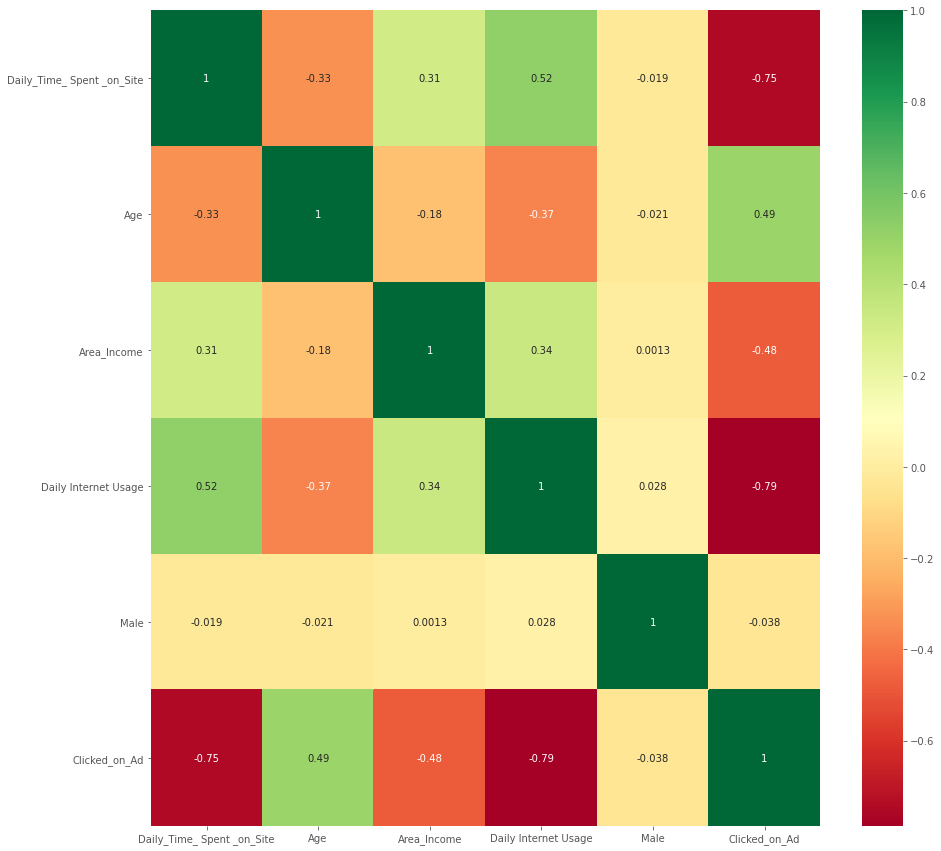

In [9]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')

Daily Time Spent on Site has negative correalation with Clicked on Ad, Same goes with Daily Internet usage and Area Income <br>

Age has positive correlation with Clicked on Ad.

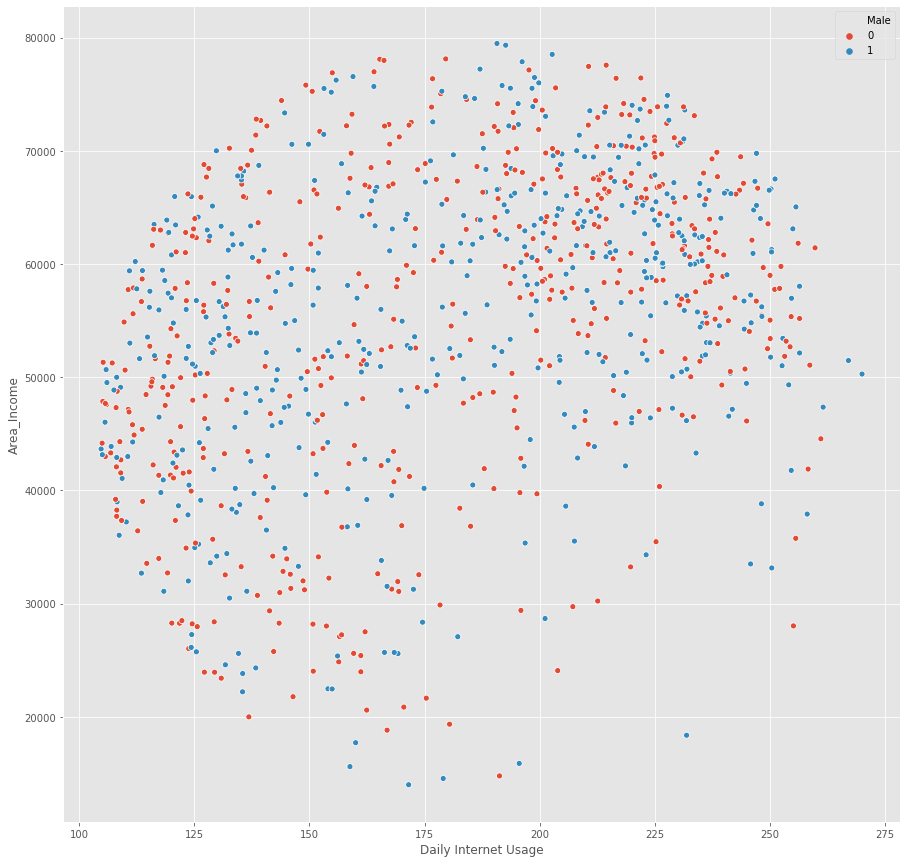

In [10]:
sns.scatterplot('Daily Internet Usage','Area_Income',hue='Male',data=data)

There seems to be no trend between Area Income and Daily Internet Usage by Gender. 

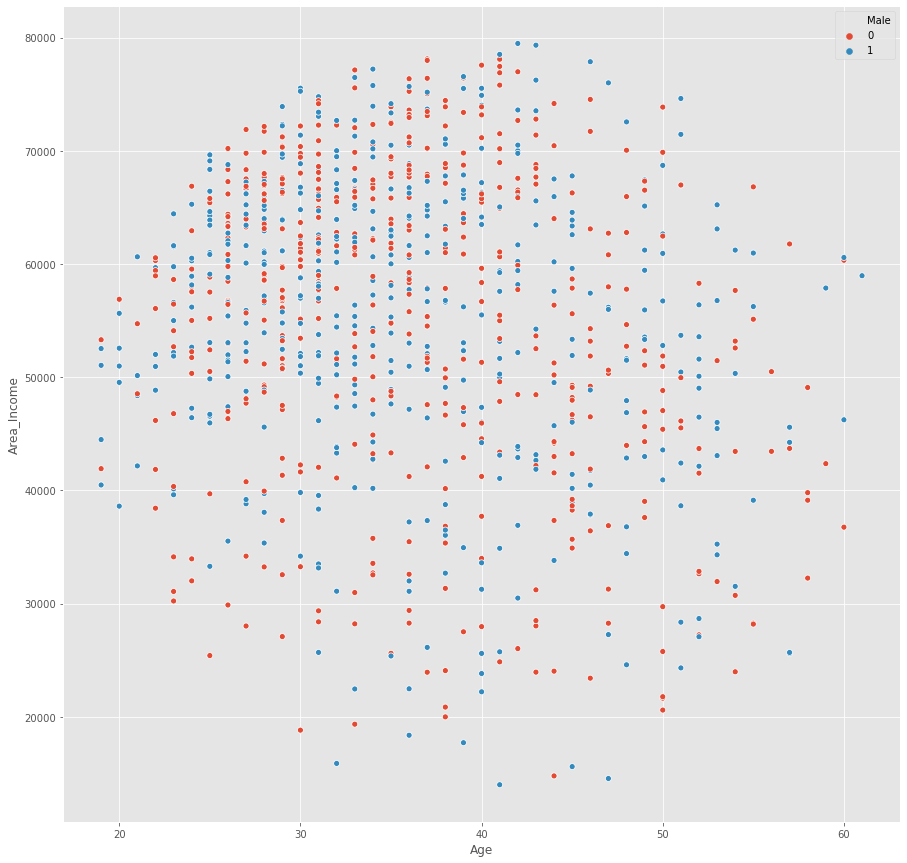

In [11]:
sns.scatterplot('Age','Area_Income',hue='Male',data=data)

No difference between age and area income by gender

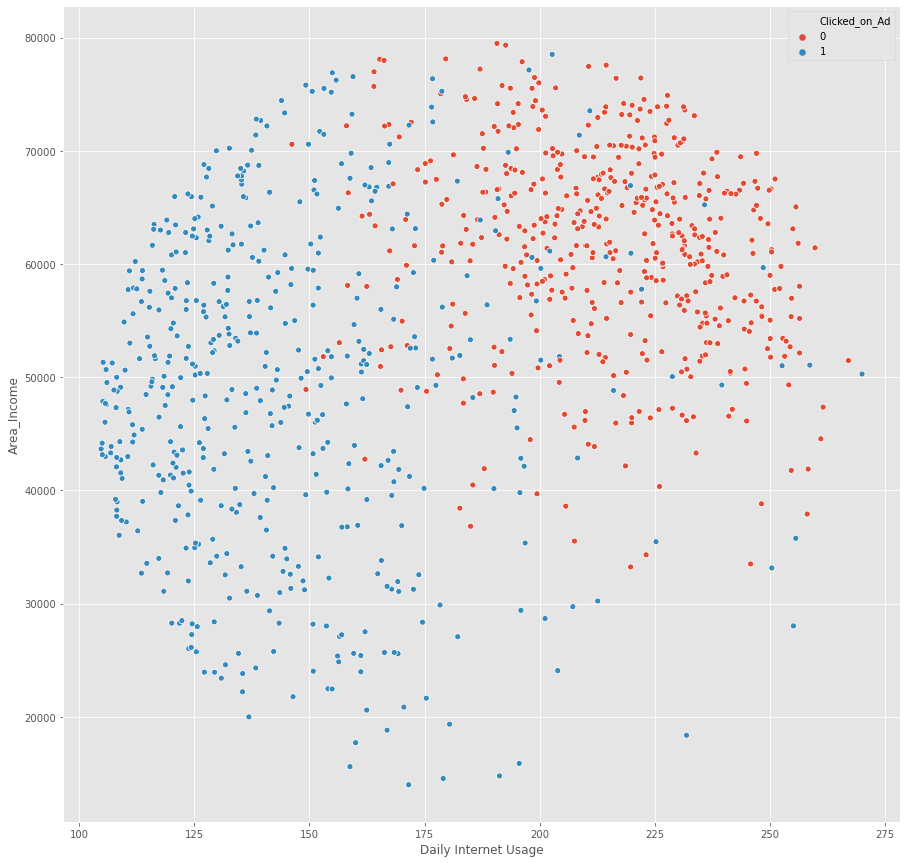

In [12]:
sns.scatterplot('Daily Internet Usage','Area_Income',hue='Clicked_on_Ad',data=data)

There seems to be a pattern, where Daily Internet Usage being less then 150, generally people have clicked on the ad <br> whereas, Daily Internet usage more then 180 and Income of more then 45000 tends to no click on the ad

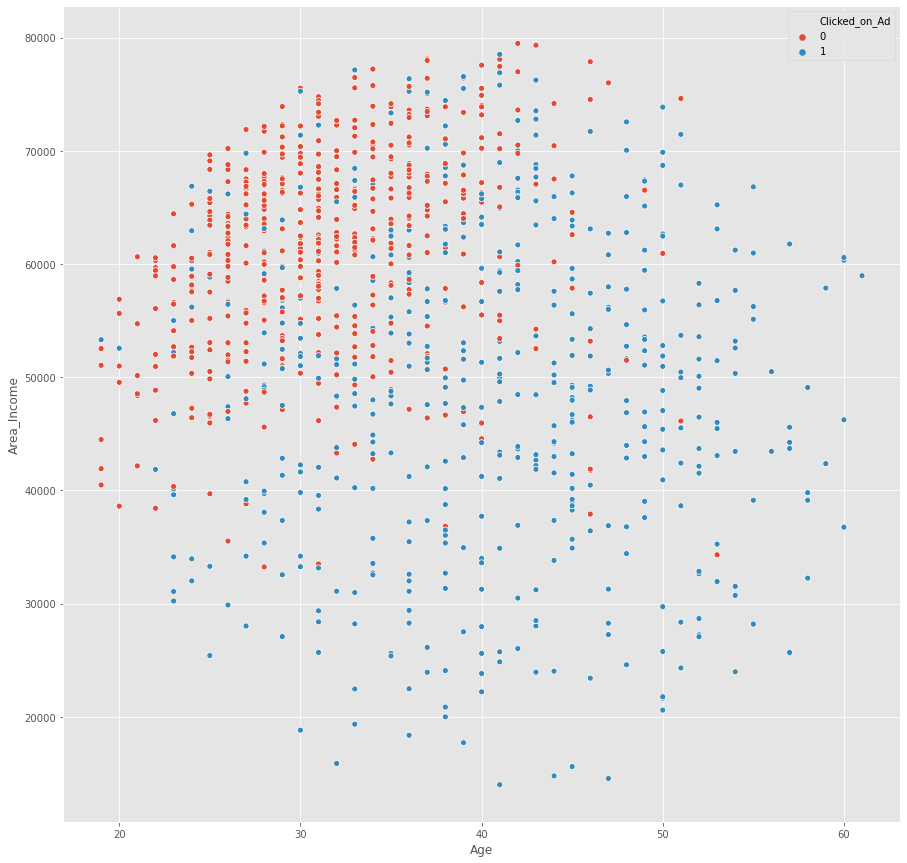

In [13]:
sns.scatterplot('Age','Area_Income',hue='Clicked_on_Ad',data=data)

Area Income upto 50K see a high click on add <br> Area Income with more than 50k and age less then 40 tends to not click on the ad <br> However, this number changes for People greater then 40

In [14]:
data.dtypes

Daily_Time_ Spent _on_Site    float64
Age                             int64
Area_Income                   float64
Daily Internet Usage          float64
Ad_Topic_Line                  object
City                           object
Male                            int64
Country                        object
Timestamp                      object
Clicked_on_Ad                   int64
dtype: object

In [15]:
data.Ad_Topic_Line.nunique()

1000

In [16]:
data.City.nunique()

969

In [17]:
data.Country.nunique()

237

In [18]:
gender_click = pd.crosstab(data['Male'],data['Clicked_on_Ad'])
gender_click

Clicked_on_Ad,0,1
Male,,
0,250,269
1,250,231


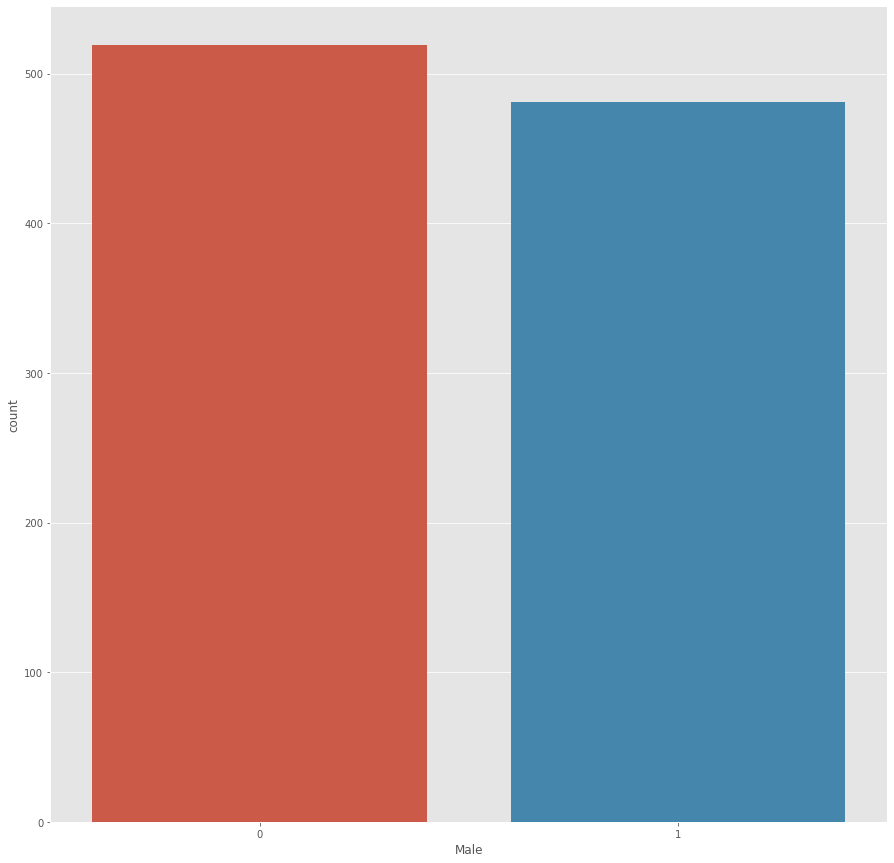

In [19]:
sns.countplot(data['Male'])

Lets Build our model

We will use only numeric data and we will drop our categorical and Time related columns from our data

In [21]:
data.dtypes

Daily_Time_ Spent _on_Site    float64
Age                             int64
Area_Income                   float64
Daily Internet Usage          float64
Ad_Topic_Line                  object
City                           object
Male                            int64
Country                        object
Timestamp                      object
Clicked_on_Ad                   int64
dtype: object

In [22]:
df = data.select_dtypes(exclude=['object'])
df

,Daily_Time_ Spent _on_Site,Age,Area_Income,Daily Internet Usage,Male,Clicked_on_Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0
...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1
996,51.30,45,67782.17,134.42,1,1
997,51.63,51,42415.72,120.37,1,1
998,55.55,19,41920.79,187.95,0,0


In [29]:
df.rename(columns={'Daily Internet Usage':'Daily_Internet_Usage','Daily_Time_ Spent _on_Site':'Daily_Time_Spent'},inplace=True)
df

C:\Users\jaic208\Anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Daily_Time_Spent,Age,Area_Income,Daily_Internet_Usage,Male,Clicked_on_Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0
...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1
996,51.30,45,67782.17,134.42,1,1
997,51.63,51,42415.72,120.37,1,1
998,55.55,19,41920.79,187.95,0,0


In [23]:
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

In [30]:
logit_model = sm.logit('Clicked_on_Ad ~ Daily_Time_Spent + Age + Area_Income + Daily_Internet_Usage + Male', data = df).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.090904
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Clicked_on_Ad   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      994
Method:                           MLE   Df Model:                            5
Date:                Tue, 21 Dec 2021   Pseudo R-squ.:                  0.8689
Time:                        08:42:44   Log-Likelihood:                -90.904
converged:                       True   LL-Null:                       -693.15
Covariance Type:            nonrobust   LLR p-value:                3.136e-258
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               27.3606      2.736      9.999      0.000      21.997      32.724
Daily_Time_Spent        -0.1927      0.021     -9.286      0.000      -0.233      -0.152
Age                      0.1709      0.026      6.607      0.000       0.120       0.222
Area_Income             -0.0001   1.88e-05     -7.245      0.000      -0.000   -9.93e-05
Daily_Internet_Usage    -0.0635      0.007     -9.390      0.000      -0.077      -0.050
Male                    -0.4217      0.404     -1.043      0.297      -1.214       0.371
========================================================================================

Possibly complete quasi-separation: A fraction 0.23 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

P-value of column Male is very high, we can remove this column and rebuild our model. We will keep this column as of now and will exclude it in next model to see if accuracy increases

In [31]:
pred = logit_model.predict(df.iloc[:,:-1])
pred

0      0.009697
1      0.007795
2      0.008651
3      0.004189
4      0.014526
         ...   
995    0.006970
996    0.999071
997    0.999995
998    0.905486
999    0.999563
Length: 1000, dtype: float64

Now we will try to find the optimal threshold which we can use for our logistic regression

In [32]:
fpr, tpr, thresholds = roc_curve(df.Clicked_on_Ad, pred)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.6326111998951827

In [33]:
import pylab as pl

In [36]:
i = np.arange(len(tpr))
roc = pd.DataFrame({'fpr': pd.Series(fpr, index=i),'tpr': pd.Series(tpr, index = i),'1-fpr': pd.Series(1-fpr, index=i),'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]


,fpr,tpr,1-fpr,tf,thresholds
17,0.036,0.966,0.964,0.002,0.370638


[]

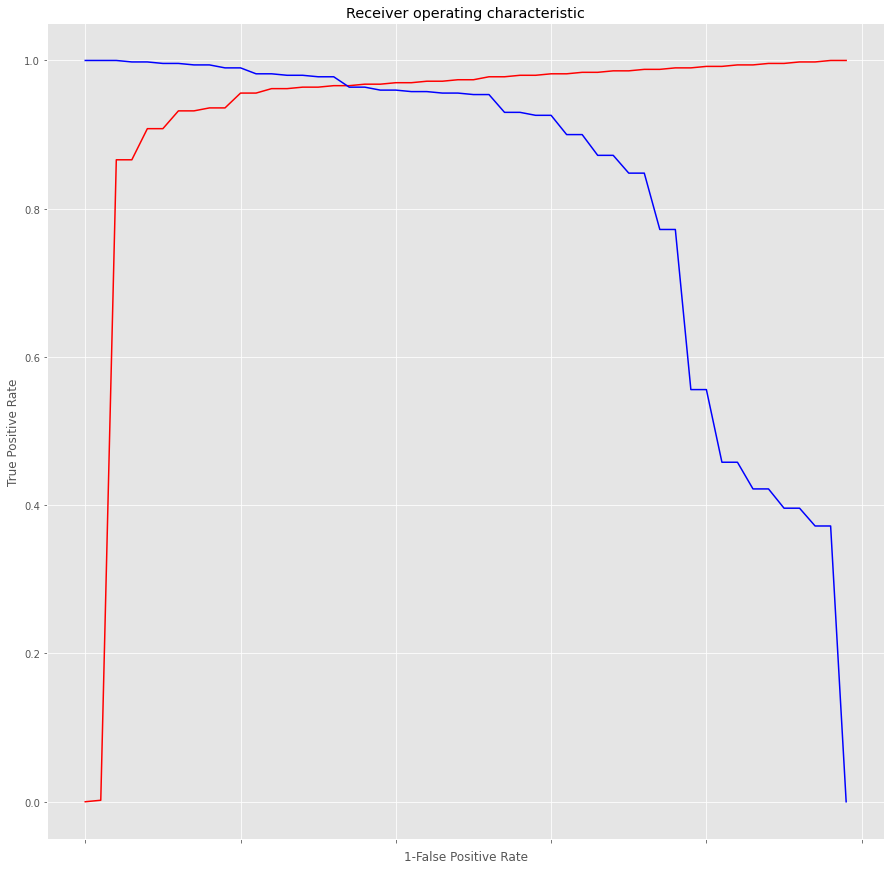

In [37]:
# Plot tpr vs 1-fpr
fig, ax = pl.subplots()
pl.plot(roc['tpr'], color = 'red')
pl.plot(roc['1-fpr'], color = 'blue')
pl.xlabel('1-False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic')
ax.set_xticklabels([])

In [38]:
roc_auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.991800


In [39]:
df['pred'] = np.zeros(len(df['Clicked_on_Ad']))
df

<ipython-input-39-427c17f6f129>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pred'] = np.zeros(len(df['Clicked_on_Ad']))


,Daily_Time_Spent,Age,Area_Income,Daily_Internet_Usage,Male,Clicked_on_Ad,pred
0,68.95,35,61833.90,256.09,0,0,0.0
1,80.23,31,68441.85,193.77,1,0,0.0
2,69.47,26,59785.94,236.50,0,0,0.0
3,74.15,29,54806.18,245.89,1,0,0.0
4,68.37,35,73889.99,225.58,0,0,0.0
...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1,0.0
996,51.30,45,67782.17,134.42,1,1,0.0
997,51.63,51,42415.72,120.37,1,1,0.0
998,55.55,19,41920.79,187.95,0,0,0.0


In [41]:
df.loc[pred > optimal_threshold, 'pred'] = 1
df

C:\Users\jaic208\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Daily_Time_Spent,Age,Area_Income,Daily_Internet_Usage,Male,Clicked_on_Ad,pred
0,68.95,35,61833.90,256.09,0,0,0.0
1,80.23,31,68441.85,193.77,1,0,0.0
2,69.47,26,59785.94,236.50,0,0,0.0
3,74.15,29,54806.18,245.89,1,0,0.0
4,68.37,35,73889.99,225.58,0,0,0.0
...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1,0.0
996,51.30,45,67782.17,134.42,1,1,1.0
997,51.63,51,42415.72,120.37,1,1,1.0
998,55.55,19,41920.79,187.95,0,0,1.0


In [42]:
# Classification Report

classification = classification_report(df['pred'], df['Clicked_on_Ad'])
print(classification)

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97       518
         1.0       0.95      0.99      0.97       482

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



In [44]:
confusion_matrix = pd.crosstab(df.pred, df.Clicked_on_Ad)
confusion_matrix

Clicked_on_Ad,0,1
pred,,
0.0,495,23
1.0,5,477


In [45]:
accuracy_score = (495+477)/(495+23+5+477)
accuracy_score

0.972

With inclusion of Male column the accuracy score we are getting is 0.972, lets remove Male column as see if it increases the overall accuracy

In [46]:
df

,Daily_Time_Spent,Age,Area_Income,Daily_Internet_Usage,Male,Clicked_on_Ad,pred
0,68.95,35,61833.90,256.09,0,0,0.0
1,80.23,31,68441.85,193.77,1,0,0.0
2,69.47,26,59785.94,236.50,0,0,0.0
3,74.15,29,54806.18,245.89,1,0,0.0
4,68.37,35,73889.99,225.58,0,0,0.0
...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1,0.0
996,51.30,45,67782.17,134.42,1,1,1.0
997,51.63,51,42415.72,120.37,1,1,1.0
998,55.55,19,41920.79,187.95,0,0,1.0


We will now drop Male and pred columns from our df

In [47]:
backup = df

In [48]:
df.drop(columns=['Male','pred'],inplace=True)
df

C:\Users\jaic208\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Daily_Time_Spent,Age,Area_Income,Daily_Internet_Usage,Clicked_on_Ad
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,0
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,0
4,68.37,35,73889.99,225.58,0
...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1
996,51.30,45,67782.17,134.42,1
997,51.63,51,42415.72,120.37,1
998,55.55,19,41920.79,187.95,0


Lets build our second model logit_model2 and see if it increases overall accuracy

In [49]:
logit_model2 = sm.logit('Clicked_on_Ad ~ Daily_Time_Spent + Age + Area_Income + Daily_Internet_Usage', data = df).fit()
logit_model2.summary()

Optimization terminated successfully.
         Current function value: 0.091452
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Clicked_on_Ad   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      995
Method:                           MLE   Df Model:                            4
Date:                Tue, 21 Dec 2021   Pseudo R-squ.:                  0.8681
Time:                        09:10:10   Log-Likelihood:                -91.452
converged:                       True   LL-Null:                       -693.15
Covariance Type:            nonrobust   LLR p-value:                2.932e-259
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               27.1291      2.714      9.995      0.000      21.809      32.449
Daily_Time_Spent        -0.1919      0.021     -9.291      0.000      -0.232      -0.151
Age                      0.1709      0.026      6.655      0.000       0.121       0.221
Area_Income             -0.0001   1.87e-05     -7.247      0.000      -0.000   -9.88e-05
Daily_Internet_Usage    -0.0639      0.007     -9.475      0.000      -0.077      -0.051
========================================================================================

Possibly complete quasi-separation: A fraction 0.23 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [58]:
pred2 = logit_model2.predict(df.iloc[:,:-1])
pred2

0      0.007679
1      0.009739
2      0.006893
3      0.005058
4      0.011744
         ...   
995    0.008626
996    0.999259
997    0.999996
998    0.883568
999    0.999442
Length: 1000, dtype: float64

In [59]:
fpr, tpr, thresholds = roc_curve(df.Clicked_on_Ad, pred2)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.6841965712506126

In [60]:
i = np.arange(len(tpr))
roc = pd.DataFrame({'fpr': pd.Series(fpr, index=i),'tpr': pd.Series(tpr, index = i),'1-fpr': pd.Series(1-fpr, index=i),'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

,fpr,tpr,1-fpr,tf,thresholds
19,0.04,0.966,0.96,0.006,0.336263


Area under the ROC curve : 0.992052


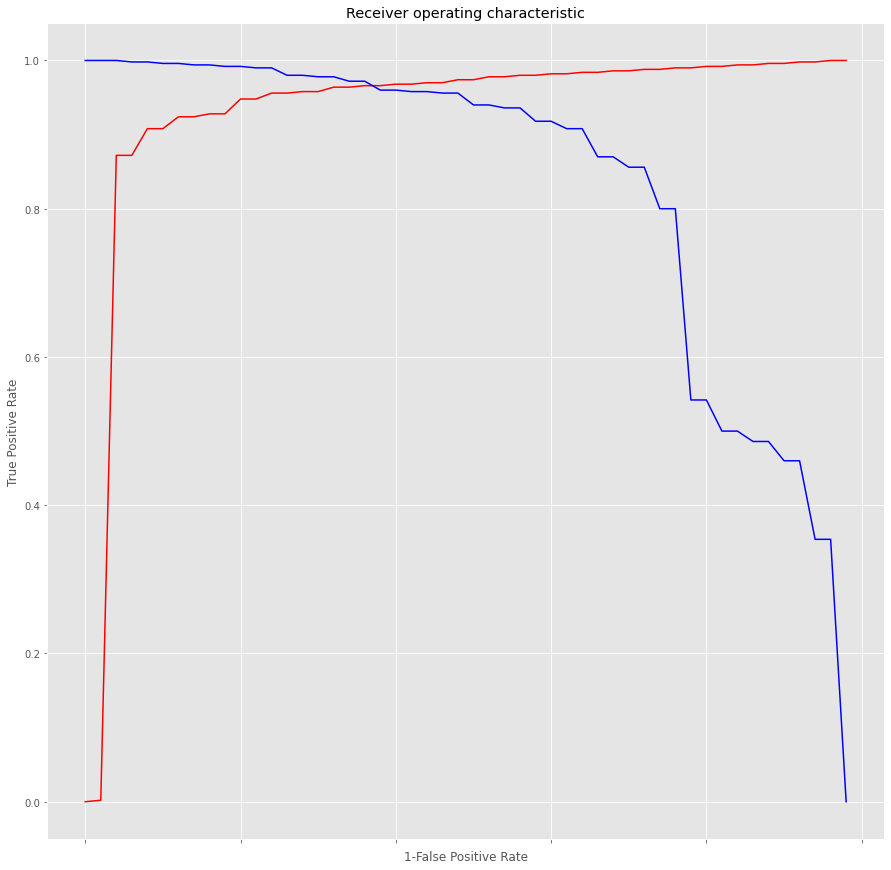

In [61]:
# Plot tpr vs 1-fpr
fig, ax = pl.subplots()
pl.plot(roc['tpr'], color = 'red')
pl.plot(roc['1-fpr'], color = 'blue')
pl.xlabel('1-False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic')
ax.set_xticklabels([])

roc_auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

In [54]:
df['pred'] = np.zeros(len(df['Clicked_on_Ad']))
df

<ipython-input-54-427c17f6f129>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pred'] = np.zeros(len(df['Clicked_on_Ad']))


,Daily_Time_Spent,Age,Area_Income,Daily_Internet_Usage,Clicked_on_Ad,pred
0,68.95,35,61833.90,256.09,0,0.0
1,80.23,31,68441.85,193.77,0,0.0
2,69.47,26,59785.94,236.50,0,0.0
3,74.15,29,54806.18,245.89,0,0.0
4,68.37,35,73889.99,225.58,0,0.0
...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,0.0
996,51.30,45,67782.17,134.42,1,0.0
997,51.63,51,42415.72,120.37,1,0.0
998,55.55,19,41920.79,187.95,0,0.0


In [62]:
df.loc[pred2 > optimal_threshold, 'pred'] = 1
df

C:\Users\jaic208\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Daily_Time_Spent,Age,Area_Income,Daily_Internet_Usage,Clicked_on_Ad,pred
0,68.95,35,61833.90,256.09,0,0.0
1,80.23,31,68441.85,193.77,0,0.0
2,69.47,26,59785.94,236.50,0,0.0
3,74.15,29,54806.18,245.89,0,0.0
4,68.37,35,73889.99,225.58,0,0.0
...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,0.0
996,51.30,45,67782.17,134.42,1,1.0
997,51.63,51,42415.72,120.37,1,1.0
998,55.55,19,41920.79,187.95,0,1.0


In [63]:
# Classification Report

classification = classification_report(df['pred'], df['Clicked_on_Ad'])
print(classification)

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97       518
         1.0       0.95      0.99      0.97       482

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



In [64]:
confusion_matrix = pd.crosstab(df.pred, df.Clicked_on_Ad)
confusion_matrix

Clicked_on_Ad,0,1
pred,,
0.0,495,23
1.0,5,477


In [65]:
accuracy_score = (495+477)/(495+23+5+477)
accuracy_score

0.972

There seems to be no change in the accuracy score without Male column, we can keep it excluded

Lets split our data into train and test sets

In [68]:
df.drop(columns='pred', inplace=True)
df

C:\Users\jaic208\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Daily_Time_Spent,Age,Area_Income,Daily_Internet_Usage,Clicked_on_Ad
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,0
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,0
4,68.37,35,73889.99,225.58,0
...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1
996,51.30,45,67782.17,134.42,1
997,51.63,51,42415.72,120.37,1
998,55.55,19,41920.79,187.95,0


In [77]:
train_data, test_data = train_test_split(df,test_size = 0.20)
print(train_data.shape, test_data.shape)

(800, 5) (200, 5)


In [78]:
train_data.Clicked_on_Ad.value_counts()/train_data.shape[0]

1    0.50375
0    0.49625
Name: Clicked_on_Ad, dtype: float64

In [79]:
test_data.Clicked_on_Ad.value_counts()/test_data.shape[0]

0    0.515
1    0.485
Name: Clicked_on_Ad, dtype: float64

In [80]:
model = sm.logit('Clicked_on_Ad ~ Daily_Time_Spent + Age + Area_Income + Daily_Internet_Usage',data=train_data).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.089849
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Clicked_on_Ad   No. Observations:                  800
Model:                          Logit   Df Residuals:                      795
Method:                           MLE   Df Model:                            4
Date:                Tue, 21 Dec 2021   Pseudo R-squ.:                  0.8704
Time:                        09:30:13   Log-Likelihood:                -71.880
converged:                       True   LL-Null:                       -554.50
Covariance Type:            nonrobust   LLR p-value:                1.222e-207
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               28.1436      3.199      8.799      0.000      21.874      34.413
Daily_Time_Spent        -0.2019      0.024     -8.279      0.000      -0.250      -0.154
Age                      0.1772      0.029      6.052      0.000       0.120       0.235
Area_Income             -0.0001   2.11e-05     -6.487      0.000      -0.000   -9.57e-05
Daily_Internet_Usage    -0.0663      0.008     -8.407      0.000      -0.082      -0.051
========================================================================================

Possibly complete quasi-separation: A fraction 0.26 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [81]:
test_pred = model.predict(test_data)

In [83]:
test_data['test_pred'] = np.zeros(len(test_data['Clicked_on_Ad']))
test_data

<ipython-input-83-49ea7a0a097f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['test_pred'] = np.zeros(len(test_data['Clicked_on_Ad']))


,Daily_Time_Spent,Age,Area_Income,Daily_Internet_Usage,Clicked_on_Ad,test_pred
228,70.68,31,74430.08,199.08,0,0.0
154,79.52,27,64287.78,183.48,0,0.0
377,69.20,42,26023.99,123.80,1,0.0
454,82.12,52,28679.93,201.15,1,0.0
481,83.26,40,70225.60,187.76,0,0.0
...,...,...,...,...,...,...
698,86.76,28,48679.54,189.91,0,0.0
307,82.70,35,61383.79,231.07,0,0.0
143,83.67,44,60192.72,234.26,0,0.0
528,46.61,52,27241.11,156.99,1,0.0


In [85]:
fpr, tpr, thresholds = roc_curve(test_data.Clicked_on_Ad, test_pred)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.7752020394240557

In [86]:
test_data.loc[test_pred > optimal_threshold, 'test_pred'] = 1
test_data

C:\Users\jaic208\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Daily_Time_Spent,Age,Area_Income,Daily_Internet_Usage,Clicked_on_Ad,test_pred
228,70.68,31,74430.08,199.08,0,0.0
154,79.52,27,64287.78,183.48,0,0.0
377,69.20,42,26023.99,123.80,1,1.0
454,82.12,52,28679.93,201.15,1,1.0
481,83.26,40,70225.60,187.76,0,0.0
...,...,...,...,...,...,...
698,86.76,28,48679.54,189.91,0,0.0
307,82.70,35,61383.79,231.07,0,0.0
143,83.67,44,60192.72,234.26,0,0.0
528,46.61,52,27241.11,156.99,1,1.0


In [88]:
confusion_matrix = pd.crosstab(test_data.test_pred, test_data.Clicked_on_Ad)
confusion_matrix

Clicked_on_Ad,0,1
test_pred,,
0.0,102,4
1.0,1,93


In [89]:
accuracy_score = (102+93)/(102+4+1+93)
accuracy_score

0.975

Our Train model is giving accuracy of 0.975, which is similar to the overall model score of 0.972. 